# ----------------- Kurzeinführung in die Datenanlyse mit R -----------------

Dies ist eine kurze Einführung in R für (Noch-)Nichtprogrammierer zum Einlesen, Analysieren und Darstellen tabellarischer Daten.

Neben der hier dargestellten Funktionalität könnt Ihr sehr einfach weitere Informationen zum Arbeiten mit R im Internet finden, z.B. durch Verwendung der Google Suchfunktion und den Ergebnissen auf der Seite stackoverflow.com - einfach mal ausprobieren.

In den Beispielen hier wird ein "Notebook" durch Hinzufügen von Zeilen erweitert, deren Typ als "Code" oder "Markdown" defineirt werden sollte (siehe Drop Down Menü oben).

Ausgeführt werden die Zellen über "Cell" --> "Run Cells" oder "Run All" bzw. für eine Zeile mit "Enter + Str"!

## Einbinden von Bibliotheken (Libraries)

Während viele Befehle zur Standardfunktion von R gehören, erfordern einige Operation Zusatzfunktionalität, welche in Form von Bibliotheken eingebunden werden kann. Hierzu muss der Befehl "library()" in Zusammenhang mit dem Namen der einzubindenden Biblithek eingeben werden.

(Das hier unten eine Warnung ausgegeben wird ist nicht weiter schlimm, es gibt nun mehrere Funktionen in zwei Versionen, uns stört das hier nicht :-))

In [201]:
library(lubridate)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Will man wissen, welche Bibliotheken gerade geladen sind, kann man das mit "search()" herausfinden! Die generell installierten, aber evtl. nicht geladenen Bibliotheken findet man über "library()".

In [202]:
search()

[1] ".GlobalEnv"        "package:dplyr"     "package:ggplot2"  
 [4] "package:lubridate" "jupyter:irkernel"  "package:stats"    
 [7] "package:graphics"  "package:grDevices" "package:utils"    
[10] "package:datasets"  "package:methods"   "Autoloads"        
[13] "package:base"

## Grundlegendes

In R arbeitet man oft mit vordefinierten Funktionen die in Bibliotheken definiert sind. Will ich Hilfe zu einer solchen Funktion, hilft Aufruf von "help(Funktionsname)". Wir testen das anhand der Mittelwertsfunktion "mean()":

In [203]:
help(mean)

In der Programmierung arbeitet man mit "Variablen" die durch "Operationen" miteinander verarbeitet werden. So kann man einer frei zu definierenden Variablen einen Wert zuweisen und diese Variable dann mit einer anderen verrechnen.

In [204]:
apples = 11
oranges = 4
fruits = apples + oranges

Schreiben wir den Namen der Variablen aus und führen die Zeile aus wird der Wert der Variable ausgegeben.

In [205]:
fruits

[1] 15

Wir können uns die Art einer Variable durch "class()" anzeigen lassen. In diesem Fall ist es eine Variable der Klasse "numeric", also eine Zahl.

In [206]:
class(fruits)

[1] "numeric"

Oft ist es parktisch sich sein Working Directory anzeigen zu lassen, z.B. wenn man eine Datei mit dem Namen aber ohne Pfad angibt, diese wird dann nämlich nur dort gesucht. Einfach geht das mit dem Aufruf von "getwd()"

In [207]:
getwd()

[1] "/home/jovyan"

## Einlesen von Daten

Das Einlesen tabellarischer Daten in R ist sehr einfach. Durch die Funktion "read.table" können tabellarische Daten in unterschiedlichen Formaten eingelesen werden. Man gibt hierfür den Namen in "", das Trennungszeichen "sep=" sowie die Information darüber, ob ein Header (eine vorangehende Nichtdatenzeile mit Spaltennamen) existiert an. Weiter kann ich angeben, welches Dezimaltrennzeichen in meinen Daten verwendet wird (dec = "."). Mit dem Argument "skip=" könnte man noch angeben, dass eine bestimmte Anzahl an Zeilen übersprungen werden soll, z.B. wenn in den ersten Zeilen unnötige Zusatzinformation enthalten ist - in unserem Testfall ist da nur ein Header, den wir nicht überspringen wollen.

Die Datei selbst sollte man zuvor über "File-->Open" und "Upload" hochladen.

Tipp: Schaut Euch die tabellarischen Daten zunächst im Texteditor Eurer Wahl (Windows: Notepad, Mac: TextEdit, ...) an. So seht Ihr wie die Daten eigentlich aussehen (Spalten, Header, Trennzeichen, etc.)!

In [208]:
mydata <- read.table("TestData.txt",sep=",",dec = ".",header=TRUE)

## Datenstruktur

Die eingelesenen Daten befinden sich nun im Speicher des Rechners als Werte der Variaben "mydata" und wir können uns diese Daten einmal ansehen. Der Befehl names(maydata) zeigt uns alle Spaltennamen an!

In [209]:
names(mydata)

[1] "date"    "minTemp" "maxTemp" "precip"

Die Klasse der Variablen "mydata" wird als "data.frame" angezeigt - dieser ist sehr ähnlich einer Excel Tabelle mit unterschiedlichen Zeilen und Spalten. Neben den Dataframes gibt es viele andere Formate (z.B. das xts Format) die alle Ihre Vorteile und evtl. leicht andere Befehlssyntax haben - das aber nur am Rande.

In [210]:
class(mydata)

[1] "data.frame"

Den gesamten Inhalt der Daten kann ich mir leicht ansehen, wenn ich alle Daten der Variable
einfach mal ausdrucke. Das mache ich indem ich die Variable ohne weiteren Befehl ausführe.

In [211]:
mydata

date,minTemp,maxTemp,precip
1948-01-01,265.95,270.85,NaN
1948-01-02,269.05,276.95,22.0
1948-01-03,274.45,277.95,12.9
1948-01-04,271.25,276.95,0.0
1948-01-05,271.05,279.95,0.9
1948-01-06,271.85,276.95,0.0
1948-01-07,271.85,277.95,0.2
1948-01-08,271.25,277.95,2.4
1948-01-09,267.85,272.85,0.0
1948-01-10,267.85,281.05,0.0


Will ich mir nur die ersten 10 Zeilen (n=10) ansehen, kann ich die Funktion "head" einsetzen!

In [212]:
head(mydata, n=10)

date,minTemp,maxTemp,precip
1948-01-01,265.95,270.85,NaN
1948-01-02,269.05,276.95,22.0
1948-01-03,274.45,277.95,12.9
1948-01-04,271.25,276.95,0.0
1948-01-05,271.05,279.95,0.9
1948-01-06,271.85,276.95,0.0
1948-01-07,271.85,277.95,0.2
1948-01-08,271.25,277.95,2.4
1948-01-09,267.85,272.85,0.0
1948-01-10,267.85,281.05,0.0


Ich kann die einzelnen Spalten der Variable ansprechen, indem ich das "$" Zeichen verwende und den Spaltennamen angebe! Wir testen das mit einem einfachen Ausdrucken der Werte für unser Datum, wieder nur für die ersten 10 Zeilen!

In [213]:
head(mydata$date, n=10)

[1] 1948-01-01 1948-01-02 1948-01-03 1948-01-04 1948-01-05 1948-01-06
 [7] 1948-01-07 1948-01-08 1948-01-09 1948-01-10
22646 Levels: 1948-01-01 1948-01-02 1948-01-03 1948-01-04 ... 2009-12-31

## Datenstatistik

Oft interresiert uns die Statistik der Daten, z.B. der Mittelwert oder die Standardabweichung - diese Information kann man sich über den Befehl "summary" ausgeben lassen!

In [214]:
summary(mydata)

         date          minTemp         maxTemp          precip       
 1948-01-01:    1   Min.   :245.7   Min.   :253.7   Min.   :  0.000  
 1948-01-02:    1   1st Qu.:271.4   1st Qu.:277.9   1st Qu.:  0.000  
 1948-01-03:    1   Median :276.9   Median :286.6   Median :  0.000  
 1948-01-04:    1   Mean   :276.6   Mean   :285.6   Mean   :  2.933  
 1948-01-05:    1   3rd Qu.:282.8   3rd Qu.:293.1   3rd Qu.:  2.700  
 1948-01-06:    1   Max.   :292.4   Max.   :307.9   Max.   :110.500  
 (Other)   :22640                                   NA's   :2        

## Einfache Plots

Einfache Diagramme (= Plots) zu erstellen ist in R relativ einfach - und sie sehen gleich gut aus :-)
Es gibt viele plotting Funktionen, eine sehr beliebte ist "ggplot", die viele Möglichkeiten bei der Erstellung von Graphiken bereitstellt (ein Schummelzettel für fast alle Optionen findet Ihr unter 
https://www.rstudio.com/wp-content/uploads/2015/06/ggplot2-german.pdf)

Zunächst ist es sehr wichtig unsere erste Spalte von reinem Text in ein Datum zu transformieren, so dass beim plotten auch entspechend geordnet und in der X-Achse beschriftet werden kann - dies erledigt die Funktion "as.date()"!

In [215]:
mydata$date = as.Date(mydata$date)

Nun können wir die Bibliothek "ggplot2" laden ("require(ggplot2)") und einen ersten Plot ausgeben. Wir geben hier als Argumente die Daten ("data=mydata"), die Datumsspalte ("aes(date)" sowie die Information, dass unsere Maximaltemperatur als Linienplot dargestellt werden soll ("+ geom_line(aes(y = maxTemp))") mit.

Wir können mit "+" auch noch die Achsen beschriften (und einen Titel hinzufügen):

+ggtitle("Neuer Bildtitel")
+xlab("Neuer x-Achsentitel")
+xlab("Neuer x-Achsentitel")

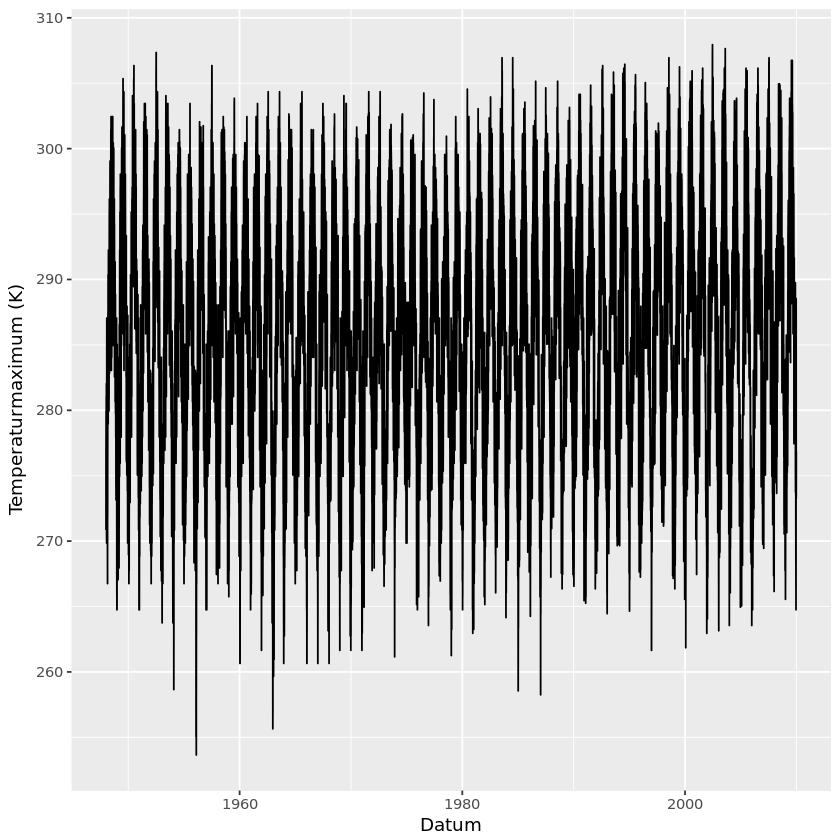

In [216]:
require(ggplot2)
ggplot(data=mydata, aes(date)) + geom_line(aes(y = maxTemp)) + xlab("Datum") + ylab("Temperaturmaximum (K)")

Wir wollen nun einen Dichte Plot erzeugen, der uns zeigt, wie die Maximaltemperatur über den Wertebereich verteilt ist. Hierzu verwenden wir erneut "ggplot" und den Zusatz "geom_density()". Dabei übergeben wir zusätzlich eine Farbe für die Füllung (fill="firebrick1") sowie ein Transparenzmaß (alpha=I(.5)). Durch das Transparenzmaß "alpha" wird die Fläche hier zu 50% transparent.

Tipp: Einen schönen Überblick über die in R standardmäßig (es gibt viele Erweiterungspakete) verfügbaren Farben findet Ihr unter: http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf

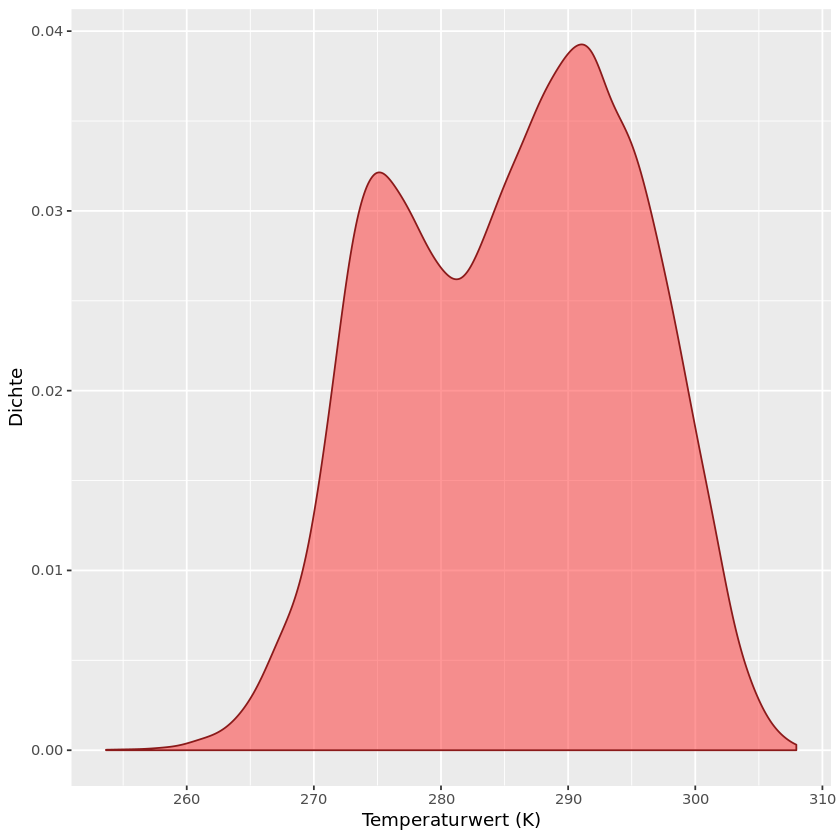

In [217]:
ggplot(mydata) + 
geom_density(aes(maxTemp),fill="firebrick1",color="firebrick4",alpha=I(.5)) +
xlab("Temperaturwert (K)") + ylab("Dichte")

Wir fügen nun auch die Minimaltemperatur hinzu, diesmal in blau!

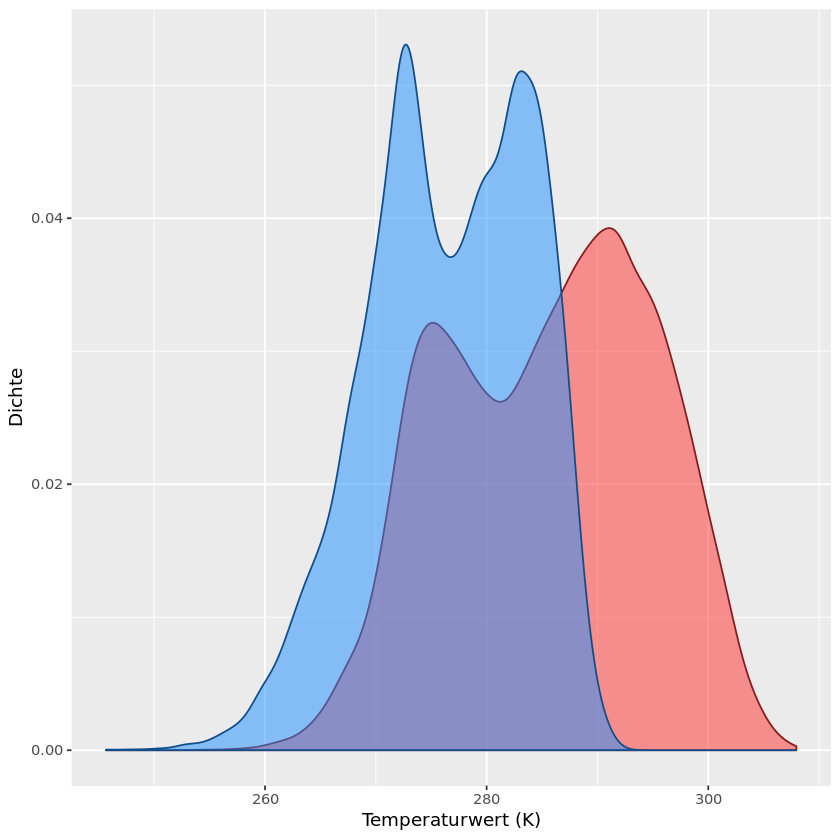

In [218]:
ggplot(mydata) + 
geom_density(aes(maxTemp),fill="firebrick1",color="firebrick4",alpha=I(.5)) +
geom_density(aes(minTemp),fill="dodgerblue1",color="dodgerblue4",alpha=I(.5)) +
xlab("Temperaturwert (K)") + ylab("Dichte")

## Zeiträume aus den Daten auswählen

Manchmal will man nur mit einem Zeitbereich einer Datenreihe arbeiten. Dann kann man auch Zeiträume wählen und am besten einer anderen Variablen zuordnen. Wir wählen zum Test nur 5 Tage und weisen die entsprechenden Werte der Variable "mydata_selection" zu. Danach geben wir uns die Werte durch Eingabe des Variablennamens aus.

In [219]:
mydata_selection = mydata[mydata$date>="2000-01-01" & mydata$date<="2000-01-05",]

In [220]:
mydata_selection

,date,minTemp,maxTemp,precip
18994,2000-01-01,267.15,271.15,5.5
18995,2000-01-02,269.15,273.15,0.0
18996,2000-01-03,265.75,269.85,0.0
18997,2000-01-04,264.25,269.35,0.0
18998,2000-01-05,266.95,274.15,0.0


## Daten monatsweise oder jährlich zusammenfassen

Will man sich eine tägliche Zeitreihe auf Monats oder Jahresbasis ansehen, so ist es erforderlich diese entsprechend zusammenzufassen (= zu aggregieren). Im Folgenden benützen wir die Funktionalität der Bibliothek "lubridate" dazu. Wir weisen einer neuen Variablen "maxTemp_month" die Werte aus "mydata" zu, gruppieren diese monatlich ("floor_date(date, "month")") und fassen dabei die Daten durch "summarize(maxTemp=mean(maxTemp))" unter Bildung des Mittelwertes zusammen.

In [221]:
maxTemp_month = mydata %>% group_by(month=floor_date(date, "month")) %>% summarize(maxTemp=mean(maxTemp))

Wir lassun uns zum Test die ersten 10 Zeilen unserer neuen Variablen ausgeben, um zu sehen, was hier passiert ist:

In [222]:
head(maxTemp_month, n = 10)

month,maxTemp
1948-01-01,277.6694
1948-02-01,276.6569
1948-03-01,285.7887
1948-04-01,288.5867
1948-05-01,294.3274
1948-06-01,293.2667
1948-07-01,293.1952
1948-08-01,294.8597
1948-09-01,292.9900
1948-10-01,287.1565


Nun wollen wir Jahresmittelwerte bilden. Das machen wir ähnlich wie für die Monatsmittel, nur geben wir bei der Gruppierung "group_by(year=floor_date(date, "year"))" an. Die Ergebnisse schreiben wir in eine neue Variable "maxTemp_year". Diesmal suchen wir nicht das Mittel der Tempearturmaxima sondern den höchsten Wert im Jahr, das Zusammenfassungskriterium ist also "max" ("summarize(maxTemp=max(maxTemp))").

In [223]:
maxTemp_year = mydata %>% group_by(year=floor_date(date, "year")) %>% summarize(maxTemp=max(maxTemp))

Wieder schauen wir uns an, wie das Ergebnis aussieht:

In [224]:
head(maxTemp_year, n=10)

year,maxTemp
1948-01-01,302.45
1949-01-01,305.35
1950-01-01,306.35
1951-01-01,303.45
1952-01-01,307.35
1953-01-01,304.05
1954-01-01,301.45
1955-01-01,303.45
1956-01-01,302.05
1957-01-01,306.35


Die eben berechneten jährlichen Temperaturmaxima wllen wir wieder plotten: 

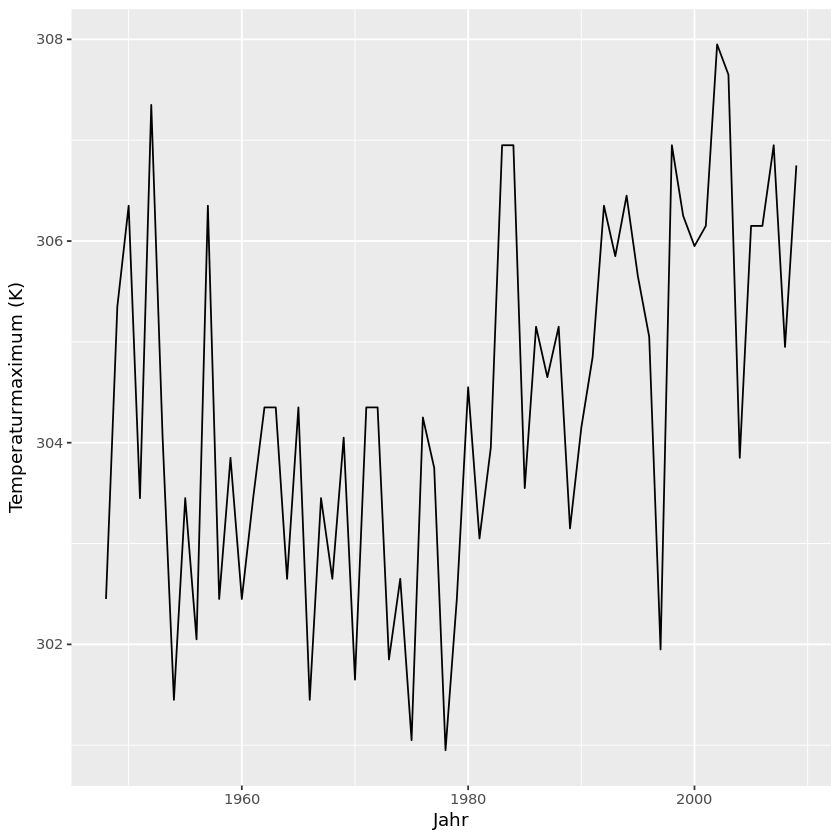

In [225]:
ggplot(data=maxTemp_year, aes(year)) + geom_line(aes(y = maxTemp)) + xlab("Jahr") + ylab("Temperaturmaximum (K)")

## Lineare Regression

Wir wollen nun einmal untersuchen, ob es hier in den Maximaltemperaturen vielleicht einen linearen Trend gibt. Dafür verwenden wir die Fumktion "lm" (linear model) und übergeben dieser zunächst den Y-Wert (die Temperatur) und dann den X-Wert (das Jahr). Die Ergebnisse schreiben wir in die Variable "fit_maxTemp"!

Zur linearen Regression: 
Die lineare Regression versucht einen Y-Wert in linearer Abhängigkeit eines X-Wertes zu berechnen. Heraus kommt eine Regressionsfunktion: y = Achsenabschnitt + Steigung * x

In [226]:
fit_maxTemp <- lm(maxTemp_year$maxTemp ~ maxTemp_year$year)

Durch diesen Aufruf haben wir eine Variable "fit_maxTemp" definiert, die alle Information zur berechneten Regression enthält. Die Koeffizienten (Achsenabschnitt (= Intercept) und die Steigung (hier: maxTemp_year$year)) kann man sich über Aufruf von "coefficients()" und Angabe der Regressionsfunktion ("fit_maxTemp") ausgeben lassen:

In [227]:
coefficients(fit_maxTemp)

(Intercept) maxTemp_year$year 
     3.039842e+02      1.308075e-04

Will man sich gleich die gesamte Zusammenfassung der Linearen Regression ansehen, verwendet man die Funktion "summary()" unter Angabe der Regressionsfunktion ("fit_maxTemp").

Ausgeben werden dann i) unter "Call" die verwendete Funktion, ii) die Statistik der Abweichungen (Residuen) unter "Residuals", iii) die Regressionskoeffizienten (Achsenabschnitt = Intercept und die Steigung) zusammen mit den Ergebnissen des Signifikanztests unter "Coefficients", sowie iv) der Standardfehler, das R2 und die F-Statistik.

Aber was heisst "Signifikanz" eigentlich: Der hier verwendete Signifikanztest testet die Regressionskoeffizienten gegen "0". Er testet also, mit welcher Wahrscheinlichkeit ich richtig liege dass z.B. die Steigung ungleich "0" ist, also eine deutliche Zu- oder Abnahme vorliegt.

In [228]:
summary(fit_maxTemp) 


Call:
lm(formula = maxTemp_year$maxTemp ~ maxTemp_year$year)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4165 -1.0542  0.1480  0.7621  4.2258 

Coefficients:
                   Estimate Std. Error  t value Pr(>|t|)    
(Intercept)       3.040e+02  2.261e-01 1344.303  < 2e-16 ***
maxTemp_year$year 1.308e-04  3.125e-05    4.186 9.43e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.608 on 60 degrees of freedom
Multiple R-squared:  0.226,	Adjusted R-squared:  0.2131 
F-statistic: 17.52 on 1 and 60 DF,  p-value: 9.428e-05


Die in Abhängigkeit des Jahres berechneten Regressionswerte kann man sich über "fitted.values" und Angabe der Regressionsfunktion ("fit_maxTemp") ausgeben lassen:

In [229]:
fitted.values(fit_maxTemp)

1        2        3        4        5        6        7        8 
302.9331 302.9809 303.0287 303.0764 303.1242 303.1720 303.2198 303.2675 
       9       10       11       12       13       14       15       16 
303.3153 303.3632 303.4109 303.4586 303.5064 303.5543 303.6020 303.6498 
      17       18       19       20       21       22       23       24 
303.6975 303.7454 303.7931 303.8409 303.8886 303.9365 303.9842 304.0320 
      25       26       27       28       29       30       31       32 
304.0797 304.1276 304.1753 304.2231 304.2708 304.3187 304.3665 304.4142 
      33       34       35       36       37       38       39       40 
304.4619 304.5098 304.5576 304.6053 304.6530 304.7009 304.7487 304.7964 
      41       42       43       44       45       46       47       48 
304.8442 304.8920 304.9398 304.9875 305.0353 305.0831 305.1309 305.1786 
      49       50       51       52       53       54       55       56 
305.2264 305.2743 305.3220 305.3697 305.4175 305.4654 305.5131 305.5609 
      57       58       59       60       61       62 
305.6086 305.6565 305.7042 305.7520 305.7997 305.8476

Die Abweichungen (=Residuen) der tatsächlichen Temperaturwerte von den über das jeweilige Jahr berechneten kann man sich über "residuals" und Angabe der Regressionsfunktion ("fit_maxTemp") ausgeben lassen:

In [230]:
residuals(fit_maxTemp)

1           2           3           4           5           6 
-0.48306126  2.36906319  3.32131844  0.37357369  4.22582894  0.87795338 
          7           8           9          10          11          12 
-1.76979137  0.18246388 -1.26528087  2.98684357 -0.96090118  0.39135408 
         13          14          15          16          17          18 
-1.05639067 -0.10426623  0.74798902  0.70024427 -1.04750048  0.60462396 
         19          20          21          22          23          24 
-2.34312079 -0.39086554 -1.23861029  0.11351416 -2.33423059  0.31802466 
         25          26          27          28          29          30 
 0.27027991 -2.27759565 -1.52534040 -3.17308515 -0.02082990 -0.56870546 
         31          32          33          34          35          36 
-3.41645021 -1.96419496  0.08806029 -1.45981526 -0.60756001  2.34469524 
         37          38          39          40          41          42 
 2.29695049 -1.15092507  0.40133018 -0.14641457  0.30584068 -1.74203487 
         43          44          45          46          47          48 
-0.78977962 -0.13752437  1.31473088  0.76685532  1.31911057  0.47136582 
         49          50          51          52          53          54 
-0.17637893 -3.32425449  1.62800076  0.88025601  0.53251126  0.68463571 
         55          56          57          58          59          60 
 2.43689096  2.08914621 -1.75859854  0.49352590  0.44578115  1.19803640 
         61          62 
-0.84970835  0.90241610

Wir fügen unserem Datensatz nun eine neue Spalte hinzu, die wir maxTemp_calculated benennen ("maxTemp_year$maxTemp_calculated") und weisen dieser Spalte die über die Regression berechneten Werte zu:

In [231]:
maxTemp_year$maxTemp_calculated = fitted.values(fit_maxTemp)

Durch Anzeigen des Headers sehen wir nach was hier passiert ist:

In [232]:
head(maxTemp_year, n=10)

year,maxTemp,maxTemp_calculated
1948-01-01,302.45,302.9331
1949-01-01,305.35,302.9809
1950-01-01,306.35,303.0287
1951-01-01,303.45,303.0764
1952-01-01,307.35,303.1242
1953-01-01,304.05,303.1720
1954-01-01,301.45,303.2198
1955-01-01,303.45,303.2675
1956-01-01,302.05,303.3153
1957-01-01,306.35,303.3632


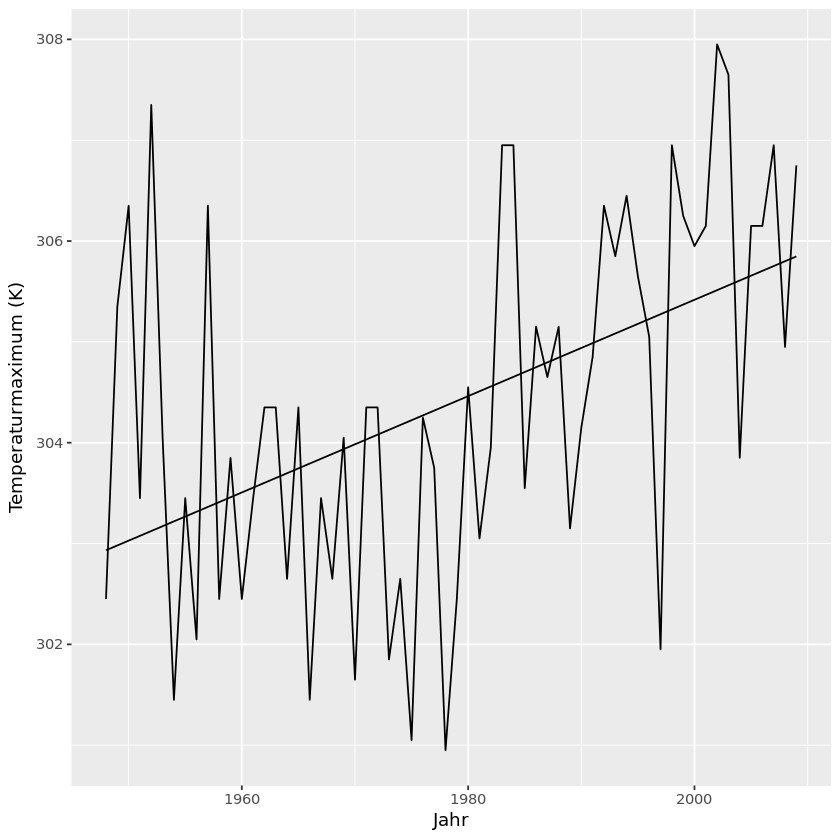

In [233]:
ggplot(maxTemp_year, aes(year)) + geom_line(aes(y = maxTemp)) + 
geom_line(aes(y = maxTemp_calculated)) + xlab("Jahr") + ylab("Temperaturmaximum (K)")

Was können wir aus unserer Trendanalyse folgern? Nun die Regressionslinie zeigt eine Zunahme der jährlichen Maximaltemperatur über den gesamten Zeitraum. Die Zusammenfassung der Regressionsberechnungen hat uns geliefert, dass die Steigung unserer Regressionsgeraden mit 3 Sternen mit einer Wahrscheinlichkeit von > 0.999 (entspricht 99.9%) und einer Irrtumswahrscheinlichkeit von < 0.001 (entspricht 0.01%) verschieden von "0" ist - es liegt also ein hochsignifikanter Trend vor.